In [2]:
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#study data file
psyco_csv_path = "psyco.csv"
df = pd.read_csv("psyco.csv")

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [4]:
# Clean incorrectly coded age range
def age_modification(age_range):
    if 'Dec-18' in age_range:
        return "0-18"
    else:
        return age_range

df['age'] = df['age'].apply(age_modification)
    
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [5]:
# Change the binary columns into usable data

# Loop through the rows to recode the values
def recode_hw(value):
    # Specify conditions and recoding mappings
    conditions = [11, 101, 111, 1001, 1011, 1101, 1111]
    recoding_mappings = [10, 100, 110, 1000, 1010, 1100, 1110]

    if value in conditions:
        return recoding_mappings[conditions.index(value)]
    else:
        return value

# Apply to the binary columns
df['recoded_like_hw'] = df['like_hw'].apply(recode_hw)
df['recoded_dislike_hw'] = df['dislike_hw'].apply(recode_hw)

df

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN,10,1
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN,100,110
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN,1110,110
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN,1110,1100


In [6]:
# Ensure the values were recoded correctly and both columns have the same values 
likehw_unique_values = np.sort(df['recoded_like_hw'].unique())
dislikehw_unique_values = np.sort(df['recoded_dislike_hw'].unique())

print(f'The values in the sorted_like_hw column are {likehw_unique_values}')
print(f'The values in the sorted_dislike_hw column are {dislikehw_unique_values}')

The values in the sorted_like_hw column are [   1   10  100  110 1000 1010 1100 1110]
The values in the sorted_dislike_hw column are [   1   10  100  110 1000 1010 1100 1110]


In [7]:
# As there are 8 unique values, convert values into a 8-point scale for easier interpretation
scale_mapping = {
    1: 1,
    10: 2,
    100: 3,
    110: 4,
    1000: 5,
    1010: 6,
    1100: 7,
    1110: 8
}

df['scaled_like_hw'] = df['recoded_like_hw'].map(scale_mapping)
df['scaled_dislike_hw'] = df['recoded_dislike_hw'].map(scale_mapping)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000,6,5


In [8]:
# Drop binary columns, recoded columns, and custom data columns 
df = df.drop(columns=["like_hw", "dislike_hw", "recoded_like_hw", "recoded_dislike_hw", "Unnamed: 19", "time_bp.1", "travel+work"])
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,Complete Physical Attendance,Yes,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,Complete Physical Attendance,No,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,Complete Physical Attendance,Yes,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,Complete Physical Attendance,Yes,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,Complete Physical Attendance,Yes,6,5


In [9]:
#Checking for Null Values
df.occupation.unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

In [10]:
df.isnull().sum()

age                    0
gender                 0
occupation             0
line_of_work         696
time_bp                0
time_dp                0
travel_time            0
easeof_online          0
home_env               0
prod_inc               0
sleep_bal              0
new_skill              0
fam_connect            0
relaxed                0
self_time              0
prefer                 0
certaindays_hw         0
scaled_like_hw         0
scaled_dislike_hw      0
dtype: int64

In [11]:
#selecting the columns required
occ_time_data = df[['occupation', 'time_bp', 'time_dp']]

In [12]:
#Group data by occupation and calculate the average work hours
occ_avg_time = occ_time_data.groupby('occupation').mean()
occ_avg_time

,time_bp,time_dp
occupation,,
Currently Out of Work,8.545455,4.886364
Entrepreneur,6.621849,8.857143
Homemaker,4.951220,10.158537
Medical Professional aiding efforts against COVID-19,8.945205,9.739726
Retired/Senior Citizen,8.000000,10.500000
Student in College,6.885475,6.458101
Student in School,7.222222,6.388889
Working Professional,8.098121,8.572025


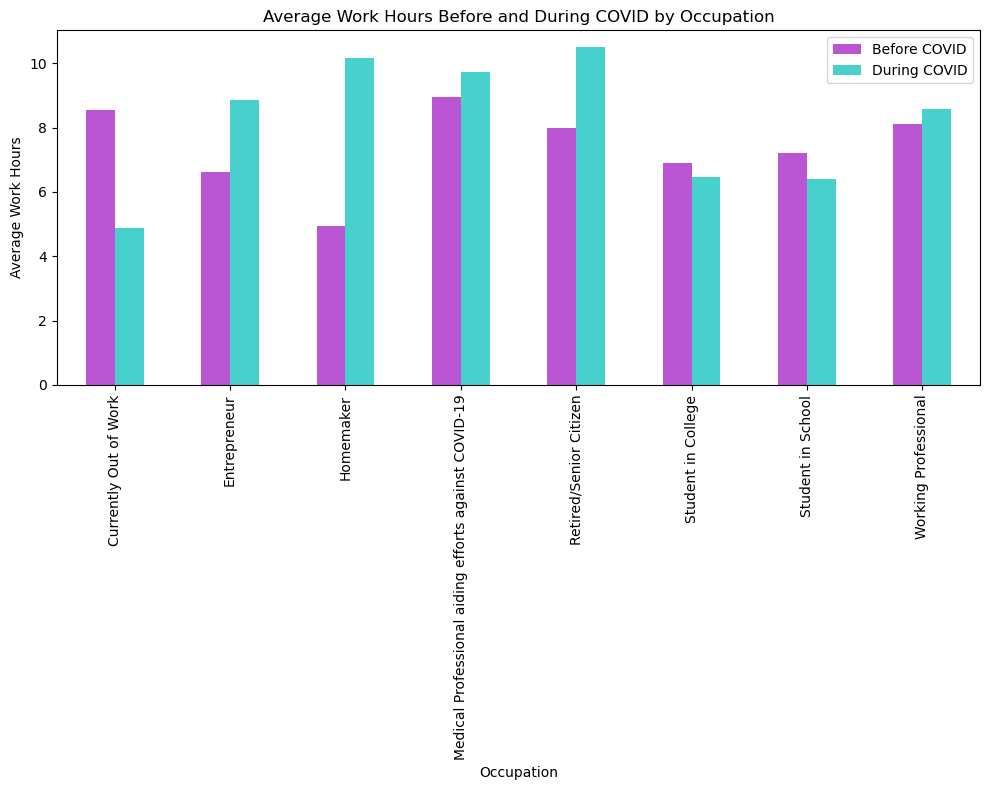

In [26]:
#Plotting Using matplotlib
occ_avg_time.plot(kind='bar', figsize=(10, 8), color = ['mediumorchid', 'mediumturquoise'])
plt.xlabel('Occupation')
plt.ylabel('Average Work Hours')
plt.title('Average Work Hours Before and During COVID by Occupation')
plt.xticks(rotation= 90)
plt.legend(['Before COVID', 'During COVID'])
plt.tight_layout()
plt.show()

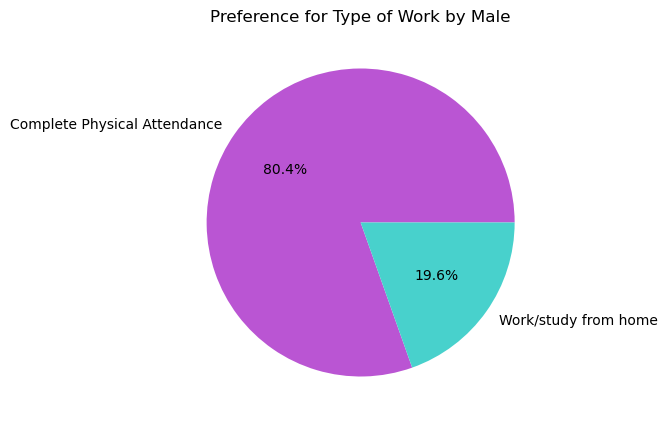

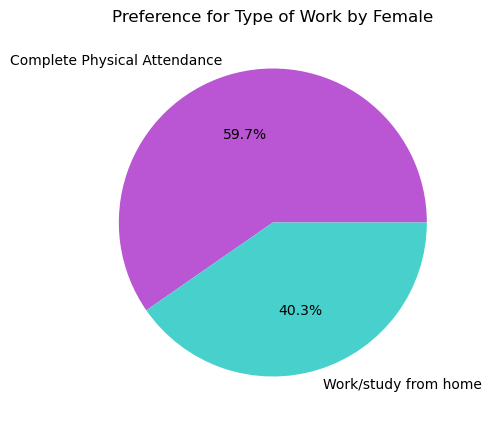

In [24]:
# Filter the DataFrame to remove rows with 'Prefer not to say'
df_filtered = df[df['gender'] != 'Prefer not to say']

# Calculate the counts for each preference by gender
count_by_preference_gender = df_filtered.groupby(['prefer', 'gender']).size()

# Extract counts for each gender
male_counts = count_by_preference_gender[:, 'Male']
female_counts = count_by_preference_gender[:, 'Female']

# Create the pie charts
fig, ax = plt.subplots(figsize=(9, 5))
ax.pie(male_counts, labels=df_filtered['prefer'].unique(), autopct='%1.1f%%', colors=['mediumorchid', 'mediumturquoise'])
ax.set_title('Preference for Type of Work by Male')
plt.show()

fig, ax = plt.subplots(figsize=(9, 5))
ax.pie(female_counts, labels=df_filtered['prefer'].unique(), autopct='%1.1f%%', colors=['mediumorchid', 'mediumturquoise'])
ax.set_title('Preference for Type of Work by Female')
plt.show()


**# Interpretation of the results**

Each segment of the pie chart represents a preference category (e.g., working from home, working from the office). The size of each segment corresponds to the proportion of respondents who indicated that preference.
The segment representing the preference for working from home would be larger for female respondents compared to male respondents, indicating a higher proportion of female respondents preferring to work from home.
Conversely, the segment representing the preference for physical attendance at the office would be larger for male respondents compared to female respondents, indicating a higher proportion of male respondents preferring physical attendance at the office.
The difference in segment sizes between male and female respondents illustrates the disparity in preferences for remote work versus physical office attendance between the two genders.
Overall, the interpretation of the pie chart highlights the varying preferences for type of work (remote versus in-office) between male and female respondents, with a larger proportion of female respondents preferring to work from home compared to male respondents.